In [ ]:
url = '/content/b049453d-aa67-4f34-92ed-293c4c5ac82d.jpg'

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(url, cv2.IMREAD_UNCHANGED)

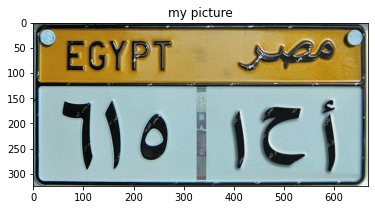

In [ ]:
plt.imshow(img)
plt.title('my picture')
plt.show()

In [ ]:
! git clone https://github.com/ZEraX4/E-ALPR

Cloning into 'E-ALPR'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 95 (delta 46), reused 75 (delta 28), pack-reused 0
Unpacking objects: 100% (95/95), done.


In [ ]:
%cd /content/E-ALPR/

/content/E-ALPR


In [ ]:
!python E-ALPR.py -i url -m model.h5

Traceback (most recent call last):
  File "E-ALPR.py", line 208, in <module>
    MODEL = tf.keras.models.load_model(args.model)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/saving/save.py", line 204, in load_model
    raise IOError(f'No file or directory found at {filepath_str}')
OSError: No file or directory found at model.h5


In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2022-03-11 12:13:14--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  84.3MB/s    in 0.4s    

2022-03-11 12:13:14 (84.3 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [ ]:
def mark(img):
    chars = {}
    digits = []
    copy = img.copy()
    # Convert to Gray
    gray = cv2.inRange(img, (0, 0, 0), (150, 70, 255))
    # Noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations=3 if img.shape[0] > 250 else 1)

    #if args.debug:
    plt.imshow(gray)
    plt.title('gray')
    plt.show()
    plt.imshow(opening)
    plt.title('opening')
    plt.show()

    # Finding characters
    cnt, he = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    k = [key for (key, value) in Counter([x[3] for x in he[0]]).items() if value >= 5]
    print(k)
    t1, t2, _ = img.shape
    for r in k:
        for i, v in enumerate(cnt):
            if he[0][i][3] == r:
                x, y, w, h = cv2.boundingRect(v)
                if .5 * t1 > h > .1 * t1 and .3 * t2 > w > .01 * t2:
                    chars[x] = opening[y:y + h, x:x + w]
                    cv2.rectangle(copy, (x - 5, y - 5), (x + w + 5, y + h + 5), (0, 255, 0), 2)
        if len(chars) < 5:
            chars = {}
            copy = img.copy()
        else:
            break
    if len(chars) >= 1:
        for i, key in enumerate(sorted(chars.keys())):
            digits.append(chars[key])
            plt.imshow(chars[key])
            plt.title(str(i))
            plt.show()

        plt.imshow(copy)
        plt.title("final")
        plt.show()
    return digits, copy

In [ ]:
import numpy as np

In [ ]:
from collections import Counter

In [ ]:
import argparse

In [ ]:
parser = argparse.ArgumentParser(description='Licence Plate Recognition')
parser.add_argument('-d', '--debug', help='Verbose output.', action='store_true')

_StoreTrueAction(option_strings=['-d', '--debug'], dest='debug', nargs=0, const=True, default=False, type=None, choices=None, help='Verbose output.', metavar=None)

In [ ]:
args = parser.parse_args()

usage: ipykernel_launcher.py [-h] [-d]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-592dee99-81b9-4e19-aa89-904f3f48ebc5.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


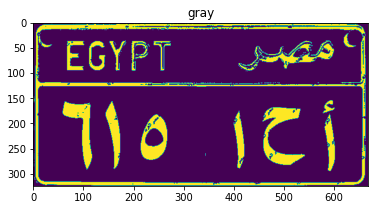

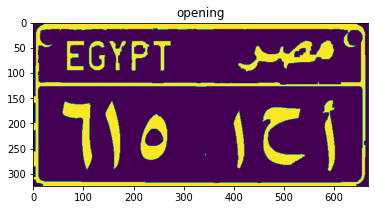

[1, 10]


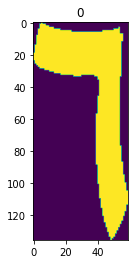

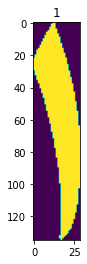

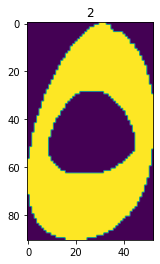

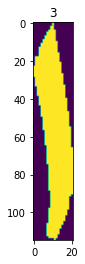

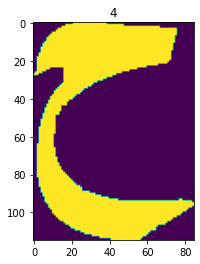

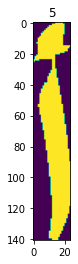

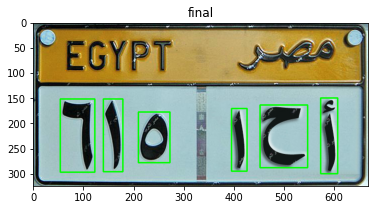

([array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],


In [ ]:
mark(img)

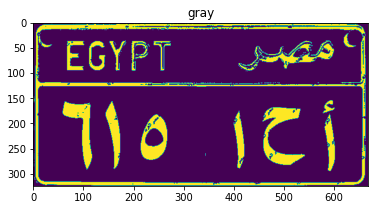

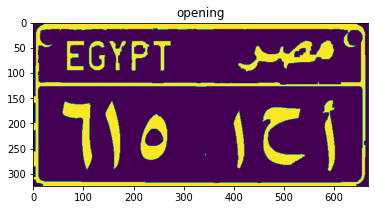

[1, 10]


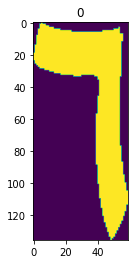

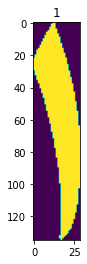

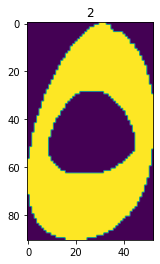

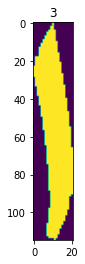

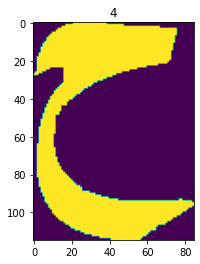

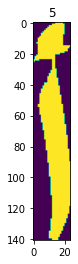

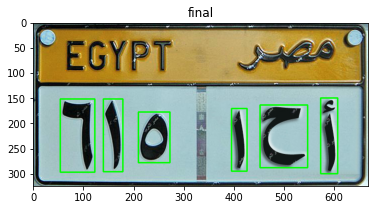

In [ ]:
digits, marked = mark(img)

In [ ]:
digits[5].shape

(141, 24)

In [ ]:
marked

array([[[ 74, 101,  98],
        [ 74, 101,  98],
        [ 74, 101,  98],
        ...,
        [124, 154, 173],
        [131, 156, 176],
        [136, 164, 175]],

       [[ 76, 103, 100],
        [ 76, 103, 100],
        [ 76, 103, 100],
        ...,
        [127, 157, 176],
        [134, 159, 179],
        [138, 166, 177]],

       [[ 79, 105, 105],
        [ 79, 105, 105],
        [ 79, 105, 105],
        ...,
        [118, 146, 163],
        [122, 148, 165],
        [123, 152, 159]],

       ...,

       [[125, 161, 171],
        [128, 164, 172],
        [126, 162, 168],
        ...,
        [228, 248, 249],
        [229, 249, 250],
        [229, 249, 250]],

       [[115, 154, 163],
        [126, 162, 170],
        [130, 166, 174],
        ...,
        [232, 252, 253],
        [232, 252, 253],
        [232, 252, 253]],

       [[ 85, 127, 140],
        [111, 148, 162],
        [127, 165, 177],
        ...,
        [238, 253, 255],
        [238, 253, 255],
        [238, 253, 255]]

In [ ]:
alphabet = {
    "a": "أ", "b": "ب", "t": "ت", "th": "ث", "g": "ج", "hh": "ح", "kh": "خ", "d": "د", "the": "ذ",
    "r": "ر", "z": "ز", "c": "س", "sh": "ش", "s": "ص", "dd": "ض", "tt": "ط", "zz": "ظ", "i": "ع",
    "gh": "غ", "f": "ف", "q": "ق", "k": "ك", "l": "ل", "m": "م", "n": "ن", "h": "ه", "w": "و",
    "y": "ي", "0": "٠", "1": "١", "2": "٢", "3": "٣", "4": "٤", "5": "٥", "6": "٦", "7": "٧",
    "8": "٨", "9": "٩"
}

In [ ]:
classes = list(alphabet.keys())

In [ ]:
def predict_image(img, model=None):
    if not model:
        raise ValueError("You Need to Submit a Model File or a Model Object")

    digits, marked = mark(img)
    prediction = {}
    plate = ''
    for i in range(len(digits)):
        try:
            resized = cv2.resize(square(digits[i]), (40, 40), interpolation=cv2.INTER_AREA)
            if args.debug:
                cv2.imshow(str(i), resized)
            result = model.predict(np.array(resized[tf.newaxis, ..., tf.newaxis], dtype='f'))
            prediction[i] = {}
            prediction[i][classes[int(np.argmax(result))]] = float(np.max(result) * 100)
            plate += (alphabet[classes[int(np.argmax(result))]] + ' ')
        except AssertionError:
            print("empty")

    printDict(prediction)
    print()
    return plate, marked

In [ ]:
def square(img):
    assert type(img) == np.ndarray
    d, r = divmod(abs(img.shape[0] - img.shape[1]), 2)
    if img.shape[0] > img.shape[1]:
        return cv2.copyMakeBorder(img, 0, 0, d if not r else d + 1, d, cv2.BORDER_CONSTANT, 0)
    else:
        return cv2.copyMakeBorder(img, d if not r else d + 1, d, 0, 0, cv2.BORDER_CONSTANT, 0)

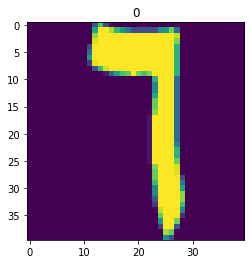

IndexError: ignored

In [ ]:
prediction = {}
plate = ''
for i in range(len(digits)):
            resized = cv2.resize(square(digits[i]), (40, 40), interpolation=cv2.INTER_AREA)
            plt.imshow(resized)
            plt.title(str(i))
            plt.show()
            #result = model.predict(np.array(resized[tf.newaxis, ..., tf.newaxis], dtype='f'))
            prediction[i] = {}
            #prediction[i][classes[int(np.argmax(result))]] = float(np.max(result) * 100)
            plate += (alphabet[classes[int(np.argmax(img))]] + ' ')

In [ ]:
t=0

In [ ]:
def predict_image(image, modelFile):
    prediction = {}
    out = ''
    digits = mark(image)
    #t = modelFile.split('.')[-1] == 'pkl'

    global MODEL
    if t==1:
        if MODEL is None:
            MODEL = joblib.load(modelFile)
        for i in range(len(digits)):
            prediction[i] = {}
            resized = cv2.resize(square(digits[i]), (40, 40))
            result = MODEL.predict([np.array(resized).ravel()])
            out += (alphabet[classes[result[0]]] + ' ')
    else:
        from tensorflow import lite
        if MODEL is None:
            MODEL = lite.Interpreter(model_path=modelFile)
            MODEL.allocate_tensors()
        for i in range(len(digits)):
            prediction[i] = {}
            resized = cv2.resize(square(digits[i]), (40, 40))
            resized = np.expand_dims(np.array(resized, dtype='f').ravel(), axis=0) / 255.0
            # Get input and output tensors.
            input_details = MODEL.get_input_details()
            output_details = MODEL.get_output_details()

            # Test the TensorFlow Lite model on random input data.
            MODEL.set_tensor(input_details[0]['index'], resized)

            MODEL.invoke()
            # The function `get_tensor()` returns a copy of the tensor data.
            # Use `tensor()` in order to get a pointer to the tensor.
            result = MODEL.get_tensor(output_details[0]['index'])
            prediction[i][classes[int(np.argmax(result))]] = float(np.max(result) * 100)
            out += (alphabet[classes[int(np.argmax(result))]] + ' ')
    return out

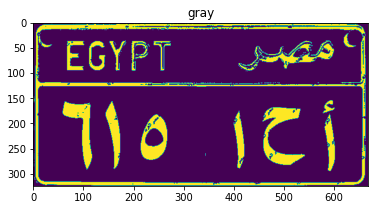

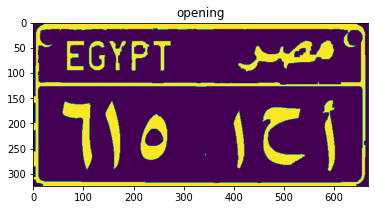

[1, 10]


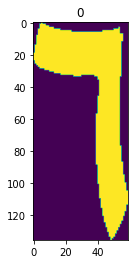

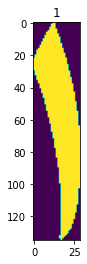

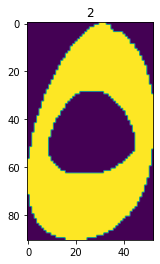

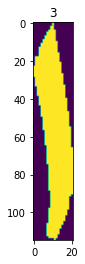

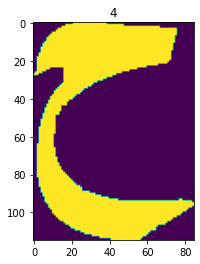

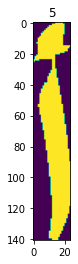

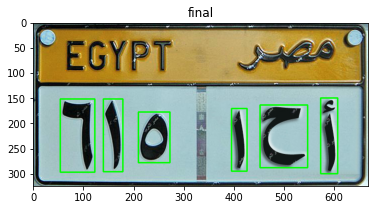

NameError: ignored

In [ ]:
predict_image(img,None)

In [ ]:
!pip install ArabicOcr

     |████████████████████████████████| 63.6 MB 1.7 MB/s 
     |████████████████████████████████| 47.8 MB 51 kB/s 


In [ ]:
from ArabicOcr import arabicocr

Using CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...


[INFO] 0.8990: EGYPT
[INFO] 0.9022: مجر
[INFO] 0.2129: أ١٤ ؛ ٦١٥
[[[[58, 21], [287, 21], [287, 110], [58, 110]], 'EGYPT', 0.898988361248574], [[[398, 17], [615, 17], [615, 106], [398, 106]], 'مجر', 0.9022380347619093], [[[46, 140], [624, 140], [624, 308], [46, 308]], 'أ١٤ ؛ ٦١٥', 0.2129365660643651]]


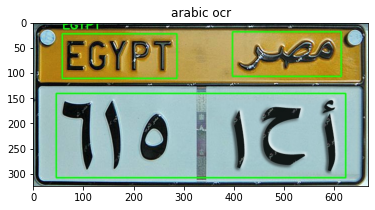

In [ ]:
image_path='/content/b049453d-aa67-4f34-92ed-293c4c5ac82d.jpg'
out_image='out.jpg'
results=arabicocr.arabic_ocr(image_path,out_image)
print(results)
words=[]
for i in range(len(results)):	
		word=results[i][1]
		words.append(word)
with open ('file.txt','w',encoding='utf-8')as myfile:
		myfile.write(str(words))
import cv2
img = cv2.imread('out.jpg', cv2.IMREAD_UNCHANGED)
#cv2.imshow("arabic ocr",img)
#cv2.waitKey(0)
plt.imshow(img)
plt.title('arabic ocr')
plt.show()

In [ ]:
results

[[[[58, 21], [287, 21], [287, 110], [58, 110]], 'EGYPT', 0.898988361248574],
 [[[398, 17], [615, 17], [615, 106], [398, 106]], 'مجر', 0.9022380347619093],
 [[[46, 140], [624, 140], [624, 308], [46, 308]],
  'أ١٤ ؛ ٦١٥',
  0.2129365660643651]]